<a href="https://colab.research.google.com/github/RanojoyBiswas/Book-Recommendation-System---Ranajay-Biswas/blob/main/Book_Recommendation_System_Ranajay_Biswas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project**    - Book Recommendation System



### **Contributor :** Ranajay Biswas

### **Github Link :**

### **Project Type**    - Unsupervised

## **Project Summary -**

A recommendation system broadly recommends items to the user best suited to their tastes and traits. It uses the user's previous data and other user's data to give new recommendations.

Book Recommendation systems are popular recommendations system as most people have a very limited time that they spend on trying out and reading new books. So, when they visit an online bookstore or just simply search on the internet about some book, it becomes important to utilize this opportunity to make recommendations that are similar to what they would like.

Also it is important to consider books that are worth reading, meaning books that are popular for being good among other readers.

So, in this project, we first perform EDA (exploratory data analysis) to find popular books, credible users, their locations etc. Then we transform the datasets, different features in the pre-processing step.

As we mentioned, it is best to recommend books considering all the factors like ratings, number of ratings and the writer of the book, book's description etc.
for that we need to take different approaches like Content based and Collaborative filtering.

Content based filtering would take different features like the book title, author's name, description and find similar books whereas, Collaborative filtering will use the user-interaction metrics to recommend. So, collaborative filtering will recommend based on user ratings.

To make intelligent recommendation system, we need to consider books that are popular among the users as well. So, we declared a threshold for number of ratings that we will be considered for recommending any book.

## **Problem Statement**

Project Description
Business Context
During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant.

items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries). Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.


## **Data Description & Attribute Information :**


The Book-Crossing dataset comprises 3 files.

**Users**:
Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

**Books**:
Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

**Ratings**:
Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by O.

## **Approach:**

This project is heavily dependent upon analyzing the data and finding the most important Features that will help us to make better recommendations. We will need to pre-process the data well before using it to calculate the similarities between different books.

Our approach to solve this problem is going to be - 

1. Understanding the dataset, different rows and columns.

2. During the EDA, we will try to find popular books and authors, where most of our readers come from. By calculating the number of votes and average ratings, we will find popular books in the data. Statistical methods and Visualizations are going to be very helpful in this EDA process.

3. In the pre-processing step, we shall filter the most important features, make necessary transformations, create or omit features as needed. Depending on the features we choose, we will find best approaches for text pre-processing.

4. There is a choice to be made when it comes which recommendation system to use, as the data have both user-interaction related features and also content-related features. So, we shall try both recommender techniques and see how it goes.

5. Then we shall conclude the project with an overview and discussion about the observations that we make, about the performance of our models and how this project can prove to be useful from a business standpoint.

## **Data Collection & Summary:**

Very first step is to import the libraries for the task. We shall start off by importing the absolute necessary packages and as we continue working on the data, we will be adding more to the list.

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(font_scale = 1.5)

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer   # importing TfidVectorizer from sklearn library

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Data Collection:

In [3]:
# reading data set
books = pd.read_csv('/content/drive/MyDrive/ML Unsupervised Projects/Book Recommendation System - Ranajay Biswas/Datasets/Books.csv')
ratings = pd.read_csv('/content/drive/MyDrive/ML Unsupervised Projects/Book Recommendation System - Ranajay Biswas/Datasets/Ratings.csv')
users = pd.read_csv('/content/drive/MyDrive/ML Unsupervised Projects/Book Recommendation System - Ranajay Biswas/Datasets/Users.csv')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
# books dataframe
books.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [6]:
# ratings dataframe
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
# users dataframe
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [8]:
# shapes of the datasets
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [9]:
# checking columns
print(f'Columns in Books data are {books.columns.tolist()}')
print(f'Columns in ratings data are {ratings.columns.tolist()}')
print(f'Columns in users data are {users.columns.tolist()}')

Columns in Books data are ['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']
Columns in ratings data are ['User-ID', 'ISBN', 'Book-Rating']
Columns in users data are ['User-ID', 'Location', 'Age']


## Exploratory Data Analysis (EDA) :

Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

### Checking null values :

In [10]:
def missing_value_checker(dataframe):

  '''this function takes a dataframe as input and returns the count 
      and percentage of data that are misssing in each column'''

  # checking the number of null values
  number_missing = dataframe.isnull().sum()

  # checking the number of null values
  percent_missing = round(dataframe.isnull().sum() * 100 / len(dataframe), 4)

  # dataframe containing the count & percentage
  dat = pd.DataFrame(list(zip(list(dataframe.columns), number_missing, percent_missing)) , columns =['feature','observations_missing', 'percentage_missing']).set_index('feature')

  return dat


In [11]:
# books data missing
books_missing = missing_value_checker(books)
print(f'Data missing in the Books dataframe - \n')
books_missing.sort_values('observations_missing', ascending = False)

Data missing in the Books dataframe - 



,observations_missing,percentage_missing
feature,,
Image-URL-L,3,0.0011
Publisher,2,0.0007
Book-Author,1,0.0004
ISBN,0,0.0000
Book-Title,0,0.0000
Year-Of-Publication,0,0.0000
Image-URL-S,0,0.0000
Image-URL-M,0,0.0000


The amount of null values are almost negligible in the books data.

In [12]:
# ratings data missing
ratings_missing = missing_value_checker(ratings)
print(f'Data missing in the ratings dataframe - \n')
ratings_missing.sort_values('observations_missing', ascending = False)

Data missing in the ratings dataframe - 



,observations_missing,percentage_missing
feature,,
User-ID,0,0.0
ISBN,0,0.0
Book-Rating,0,0.0


No missing values in the ratings data.

In [13]:
# users data missing
users_missing = missing_value_checker(users)
print(f'Data missing in the users dataframe - \n')
users_missing.sort_values('observations_missing', ascending = False)

Data missing in the users dataframe - 



,observations_missing,percentage_missing
feature,,
Age,110762,39.7199
User-ID,0,0.0000
Location,0,0.0000


For the users data, we see that Age column has many null values. almost 40 percent data is missing for this column.

### Checking duplicates:

In [14]:
print(f'Duplicate observations in Books data are - {books.duplicated().sum()}')

Duplicate observations in Books data are - 0


In [15]:
print(f'Duplicate observations in ratings data are - {ratings.duplicated().sum()}')

Duplicate observations in ratings data are - 0


In [16]:
print(f'Duplicate observations in users data are - {users.duplicated().sum()}')

Duplicate observations in users data are - 0


The number of null values in the books data are insignificant. So, we will drop them.

In [17]:
# dropping the null values
books.dropna(inplace = True)

In [18]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [19]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271354 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271354 non-null  object
 1   Book-Title           271354 non-null  object
 2   Book-Author          271354 non-null  object
 3   Year-Of-Publication  271354 non-null  object
 4   Publisher            271354 non-null  object
 5   Image-URL-S          271354 non-null  object
 6   Image-URL-M          271354 non-null  object
 7   Image-URL-L          271354 non-null  object
dtypes: object(8)
memory usage: 18.6+ MB


Users age will not be useful even if we impute the null values in that column. And we will take a model building approach where we will not need users' age. So, we will have to drop that column.

But before dropping, let's check the distribution the rest of the data that is available in this column.

[]

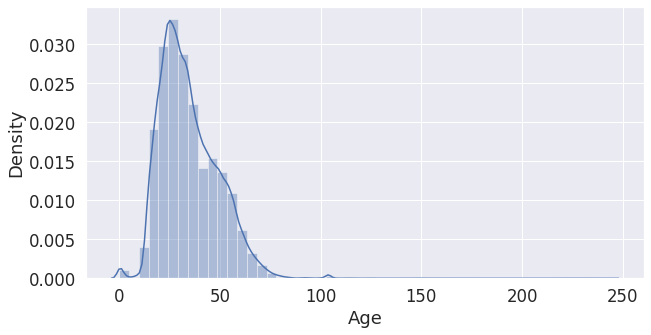

In [20]:
plt.figure(figsize = (10,5))
sns.distplot(users['Age'])
plt.plot()

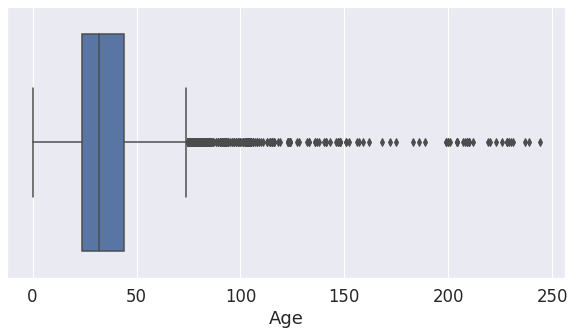

In [21]:
plt.figure(figsize = (10,5))
sns.boxplot(users['Age'])

Most of the readers are below 45 years of age. We can also see that there are many non-sensical values like all the values above 85 or 90. So, we can say that this column will not be really useful.

Total numbers of unique books:

In [22]:
# number of unique books
print(f"Total number of unique books - {books['Book-Title'].nunique()}")

Total number of unique books - 242130


### Year Of Publication:

In [23]:
yr = books['Year-Of-Publication'].value_counts().head(10)
yr = yr.reset_index().rename(columns = {'index': 'Year-Of-Publication', 'Year-Of-Publication': 'Count'})
yr

,Year-Of-Publication,Count
0,2002,13902
1,2001,13714
2,1999,13414
3,2000,13373
4,1998,12116
5,2003,11610
6,1997,11494
7,1996,10687
8,1995,10258
9,1994,8857


[Text(0.5, 1.0, 'Top 10 Years of Publications')]

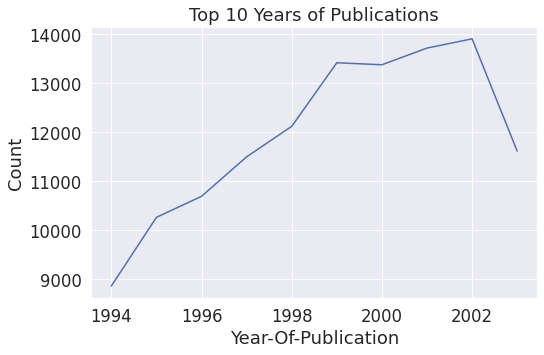

In [24]:
plt.figure(figsize= (8,5))
sns.lineplot(data = yr, x = yr['Year-Of-Publication'], y = yr['Count']).set(title='Top 10 Years of Publications')

* Most number of books were published after 1994. 
* In 2002, most number of books were published.

### Authors

We have same book titles appearing more than once in the data and for those the author is also same, so we need to drop those duplicates if we want to count the actual number of times that particular author has repeated.


In [25]:
# dropping duplicates
b = books.drop_duplicates('Book-Title')
b = b['Book-Author'].value_counts().sort_values(ascending = False).head(10).reset_index().rename(columns = {'index': 'Author', 'Book-Author': 'Count'})

In [26]:
# functionm to plot barplot
def barplot(x_col, y_col, dataframe, title, pal = 'hls', annot = 0, rot = 0):

  '''Input :1. x column,
            2. y column,
            3. dataframe,
            4. palette,
            5. annotation (1 = yes)
            6. rotation of x labels(1 = yes)'''
  
  plt.figure(figsize=(12,7))
  ax = sns.barplot(x = x_col , y = y_col, data = dataframe, palette = pal)
  ax.set_title(title)
  if rot == 1:
    ax.set_xticklabels(labels = dataframe[x_col], rotation=90)
  else:
    pass

  if annot == 1:
    for p in ax.patches:
      ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
  else:
    pass

  plt.show()

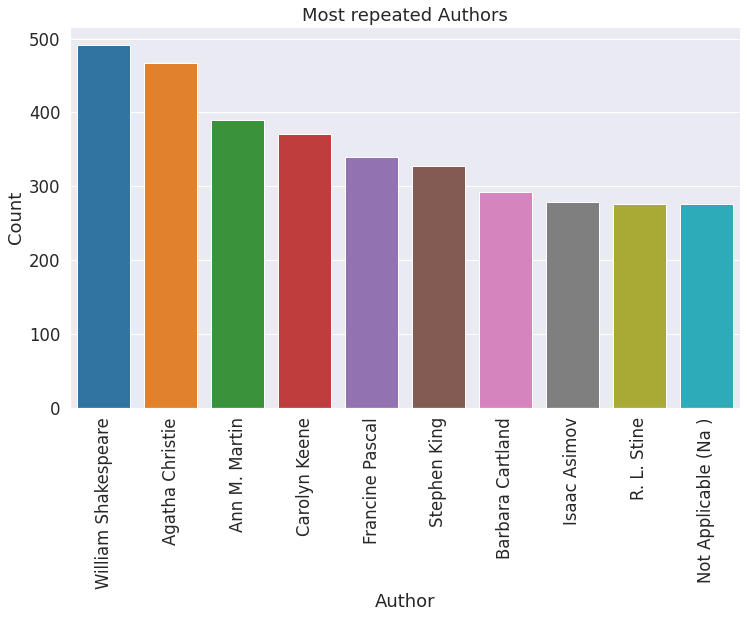

In [27]:
# visualizing most repeated authors
barplot('Author', 'Count', b, 'Most repeated Authors', rot =1, pal = 'tab10')